In [1]:
import numpy as np
import random
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(10)

class Agent:
    def __init__(self, a_type, x, y):
        self.tol = round(np.random.uniform(0,1),2)
        self.x = x
        self.y = y
        self.a_type = a_type
        self.location = [self.x, self.y]
    #Вычисление евклидового расстояния
    def get_distance(self, other):
        a = (self.location[0] - other.location[0])**2
        b = (self.location[1] - other.location[1])**2
        return sqrt(a + b)
    #Проверка на то, счастлив ли агент
    #если число соседей (которое мы укажем) определенного типа больше чем требуемое количество, то агент счастлив
    def happy(self, agents):
        distances = []
        for agent in agents:
            if self != agent:
                distance = self.get_distance(agent)
                distances.append((distance, agent))
        distances.sort(key=lambda x: x[0])
        neighbors = [agent for d, agent in distances[:num_neighbors]]
        num_same_type = sum(self.a_type == agent.a_type for agent in neighbors)
        return num_same_type >= require_same_type

    def update(self, agents, pos_coord):
        #Составляем список пустых ячеек
        self.pos_coord_loc = pos_coord
        for agent in agents:
            self.pos_coord_loc.remove(agent.location)
        #Меняется локация, пока агент не станет счастливым    
        i = 0
        while not self.happy(agents) and i != len(self.pos_coord_loc)-1:
            self.location = self.pos_coord_loc[i]
            i += 1
        
def plot_distribution(agents, cycle_num):
    x_values_0, y_values_0 = [], []
    x_values_1, y_values_1 = [], []
    x_values_2, y_values_2 = [], []
    for agent in agents:
        x, y = agent.location
        if agent.a_type == 0:
            x_values_0.append(x)
            y_values_0.append(y)
        elif agent.a_type ==1:
            x_values_1.append(x)
            y_values_1.append(y)
        else:
            x_values_2.append(x)
            y_values_2.append(y)
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_args = {'markersize': 8, 'alpha': 1}
    ax.set_facecolor('white')
    ax.plot(x_values_0, y_values_0, 'o', markerfacecolor='black', **plot_args)
    ax.plot(x_values_1, y_values_1, 'o', markerfacecolor='yellow', **plot_args)
    ax.plot(x_values_2, y_values_2, 'o', markerfacecolor='lime', **plot_args)
    ax.set_title(f'Cycle {cycle_num-1}')
    plt.show()

#Инициализация переменных
count = 1    
size = 30
num_agents = 600
num_of_type_0 = 200
num_of_type_1 = 200
num_of_type_2 = 200
num_neighbors = 10
require_same_type = 5
#Список координат
pos_coord = [[x, y] for x in range(size) for y in range(1, size+1)]
coord = random.sample(pos_coord, num_agents)

agents = [Agent(0, coord[i][0], coord[i][1]) for i in range(num_of_type_0)]
agents.extend(Agent(1, coord[i + num_of_type_0][0], coord[i + num_of_type_0][1]) for i in range(num_of_type_1))
agents.extend(Agent(2, coord[i + num_of_type_0 + num_of_type_1][0], coord[i + num_of_type_0 + num_of_type_1][1]) for i in range(num_of_type_2))

### Simulation

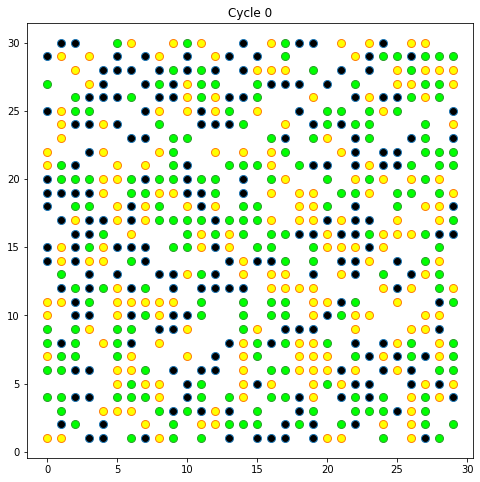

ValueError: list.remove(x): x not in list

In [2]:
#plot_distribution(agents,count)
while True:
    plot_distribution(agents, count)
    count += 1
    no_one_moved = True
    for agent in agents:
        old_location = agent.location
        agent.update(agents, pos_coord)
        if agent.location != old_location:
            no_one_moved = False
    if no_one_moved:
        break

In [143]:
agents[1].update(agents, pos_coord)

ValueError: list.remove(x): x not in list

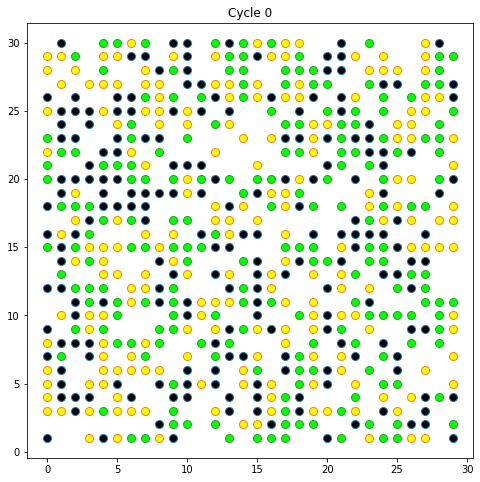

In [125]:
plot_distribution(agents,count)

In [126]:
agents[0].location

[9, 19]